In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys

In [27]:
# main folder where the processed files are
basedir = '/global/cscratch1/sd/jfarr/LyaSkewers/CoLoRe_revamp/process_output_hZ_4096_32/'
basedir = '/Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8/'
nside = 8
lya = 1215.67

In [28]:
pix = 276
iskewer = 0

In [29]:
pix_100 = int(pix/100)
dirname = basedir+'/'+str(pix_100)+'/'+str(pix)+'/'
suffix = str(nside)+'-'+str(pix)+'.fits'
print('dir name',dirname)

dir name /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276/


gaussian density file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//gaussian-colore-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//gaussian-colore-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     26   44R x 6C   [E, E, E, E, E, K]   
  2  GAUSSIAN_DELTA    1 ImageHDU        13   (2048, 44)   float32   
  3  VELOCITY      1 ImageHDU        13   (2048, 44)   float32   
  4  COSMO         1 BinTableHDU     22   2048R x 4C   [E, E, E, E]   


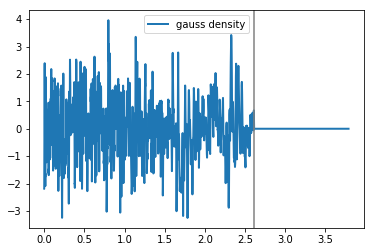

In [30]:
# file with Gaussian density
gauss_dens_file = dirname+'/gaussian-colore-'+suffix
print('gaussian density file',gauss_dens_file)
gauss_dens_hdu = fits.open(gauss_dens_file)
gauss_dens_hdu.info()
zq = gauss_dens_hdu[1].data['Z_COSMO']
gauss_dens = gauss_dens_hdu[2].data
gauss_dens_zs = gauss_dens_hdu[4].data['Z']
gauss_dens_hdu.close()

plt.plot(gauss_dens_zs,gauss_dens[iskewer],lw=2,label='gauss density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.legend()
plt.show()

physical density file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//physical-colore-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//physical-colore-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  CATALOG       1 BinTableHDU     25   44R x 6C   [E, E, E, E, E, K]   
  2  PHYSICAL_DELTA    1 ImageHDU        12   (2048, 44)   float32   
  3  VELOCITY      1 ImageHDU        12   (2048, 44)   float32   
  4  COSMO         1 BinTableHDU     21   2048R x 4C   [E, E, E, E]   


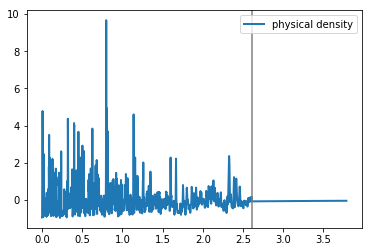

In [31]:
# file with physical density
phys_dens_file = dirname+'/physical-colore-'+suffix
print('physical density file',phys_dens_file)
phys_dens_hdu = fits.open(phys_dens_file)
phys_dens_hdu.info()
phys_dens = phys_dens_hdu[2].data
phys_dens_zs = phys_dens_hdu[4].data['Z']
phys_dens_hdu.close()

plt.plot(phys_dens_zs,phys_dens[iskewer],lw=2,label='physical density')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.legend()
plt.show()

physical density file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//transmission-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//transmission-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  METADATA      1 BinTableHDU     21   38R x 4C   [E, E, E, K]   
  2  WAVELENGTH    1 ImageHDU        11   (5476,)   float64   
  3  TRANSMISSION    1 ImageHDU        12   (38, 5476)   float64   


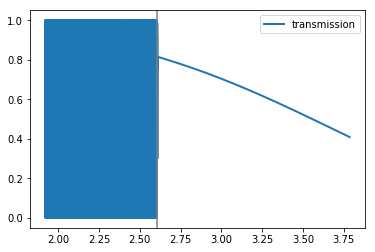

In [35]:
# file with transmission
transmission_file = dirname+'/transmission-'+suffix
print('physical density file',transmission_file)
transmission_hdu = fits.open(transmission_file)

transmission_hdu.info()
transmission = transmission_hdu[3].data
transmission_zs = transmission_hdu[2].data/lya - 1
transmission_hdu.close()

plt.plot(transmission_zs,transmission[:,iskewer],lw=2,label='transmission')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.legend()
plt.show()

picca gaussian file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-gaussian-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-gaussian-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  METADATA      1 PrimaryHDU      11   (31, 5476)   float64   
  1  IV            1 ImageHDU        12   (31, 5476)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5476,)   float64   
  3  CATALOG       1 BinTableHDU     27   31R x 7C   [E, E, E, K, E, K, K]   


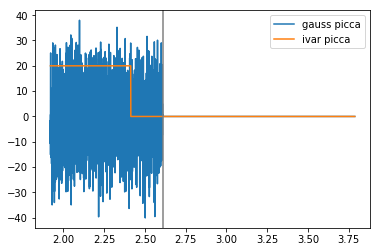

In [36]:
# file with delta gaussian for picca
picca_gauss_file = dirname+'/picca-gaussian-'+suffix
print('picca gaussian file',picca_gauss_file)
picca_gauss_hdu = fits.open(picca_gauss_file)
picca_gauss_hdu.info()
picca_gauss_delta = picca_gauss_hdu[0].data
picca_ivar = picca_gauss_hdu[1].data
picca_gauss_ll = picca_gauss_hdu[2].data
picca_gauss_hdu.close()
lya=1215.67
picca_zs = (10**picca_gauss_ll)/lya - 1.0

plt.plot(picca_zs,picca_gauss_delta[:,iskewer],label='gauss picca')
plt.plot(picca_zs,20*picca_ivar[:,iskewer],label='ivar picca')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.legend()
plt.show()

picca density file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-density-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-density-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      11   (31, 5476)   float32   
  1  IV            1 ImageHDU        12   (31, 5476)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5476,)   float64   
  3  CATALOG       1 BinTableHDU     27   31R x 7C   [E, E, E, K, E, K, K]   


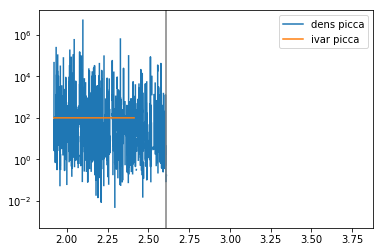

In [38]:
# file with delta density for picca
picca_dens_file = dirname+'/picca-density-'+suffix
print('picca density file',picca_dens_file)
picca_dens_hdu = fits.open(picca_dens_file)
picca_dens_hdu.info()
picca_dens_delta = picca_dens_hdu[0].data
picca_dens_hdu.close()

plt.plot(picca_zs,picca_dens_delta[:,iskewer],label='dens picca')
plt.plot(picca_zs,100*picca_ivar[:,iskewer],label='ivar picca')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.semilogy()
plt.legend()
plt.show()

picca flux file /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-flux-8-276.fits
Filename: /Users/jfarr/Projects/test_data/process_output_G_hZ_4096_32_sr2.0_bm1_nside8//2/276//picca-flux-8-276.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  CATALOG       1 PrimaryHDU      11   (31, 5476)   float64   
  1  IV            1 ImageHDU        12   (31, 5476)   float32   
  2  LOGLAM_MAP    1 ImageHDU        11   (5476,)   float64   
  3  CATALOG       1 BinTableHDU     27   31R x 7C   [E, E, E, K, E, K, K]   


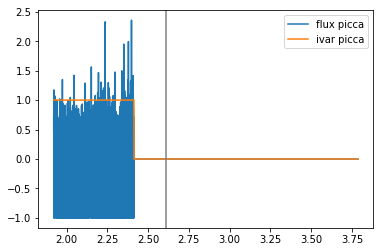

In [40]:
# file with flux density for picca
picca_flux_file = dirname+'/picca-flux-'+suffix
print('picca flux file',picca_flux_file)
picca_flux_hdu = fits.open(picca_flux_file)
picca_flux_hdu.info()
picca_flux_delta = picca_flux_hdu[0].data
picca_flux_hdu.close()

plt.plot(picca_zs,picca_flux_delta[:,iskewer],label='flux picca')
plt.plot(picca_zs,picca_ivar[:,iskewer],label='ivar picca')
plt.axvline(x=zq[iskewer],c=(0.5,0.5,0.5))
plt.legend()
plt.show()